In [26]:
print("테스트")

테스트


# 패키지, 데이터 로딩

In [27]:
import pandas as pd
import numpy as np

train = pd.read_csv("data/bike/train.csv", parse_dates = ["datetime"]) 
test = pd.read_csv("data/bike/test.csv", parse_dates = ["datetime"]) 

# parse_dates앞에 쉼표, 뒤에는 괄호

print(train.shape, test.shape)

(10886, 12) (6493, 9)


# Feature Engineering

## 데이터 전처리

- NaN 처리 (없음)
- 이상값 처리 (NaN을 가장한 0 데이터 등) : WindSpeed
- category화 ==> 필요시 원핫인코딩
- datetime은 weekofday 등으로 세분화

## "기타 검토사항들"
- temp, atemp 이상값 => 테스트에는 없어서 안해도 됨
- holiday가 정말 holiday인지, workingday와 상관관계

- 시간으로 인한 사용량 차이

## NaN체크

In [28]:
print(train.shape, test.shape)
print(train.info())
print(test.info())

(10886, 12) (6493, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64


## Datetime 처리

In [29]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["dayofweek"] = train["datetime"].dt.dayofweek 
#weekofday가 아니라 dayofweek으로 넣어야

test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["dayofweek"] = test["datetime"].dt.dayofweek

print(train.shape, test.shape)
train.head()

(10886, 17) (6493, 14)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


# 카테고리로 데이터타입 변경

In [30]:
category_feature = ["season", "holiday", "workingday", "weather", "year", "month", "dayofweek", "day"]

print(train.info(), test.info())

for var in category_feature:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

print(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(13)
memory usage: 1.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 14 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null

# WindSpeed (0으로 잘못 입력된 NaN)

## "데이터 시각화"

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

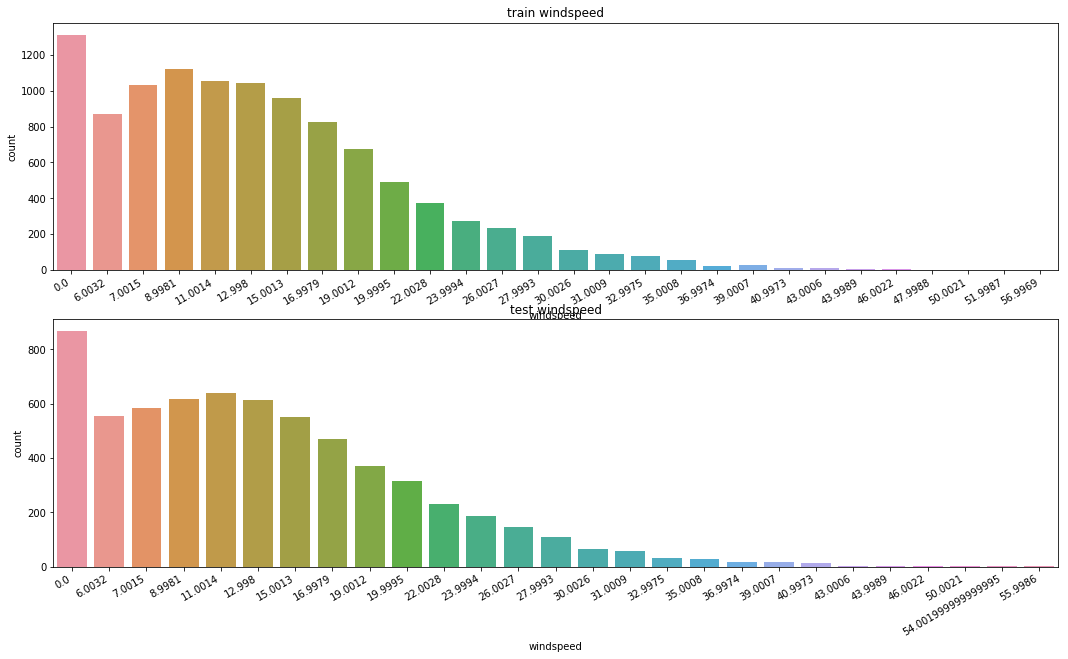

In [32]:
fig, axes = plt.subplots(nrows = 2) # 그래프 개수
fig.set_size_inches(18, 10) # 전체 그래프 크기 (가로, 높이)

# train
plt.sca(axes[0]) #그래프 순서 세팅
axes[0].set (ylabel = 'count', title = 'train windspeed') #y축과 제목 세팅
plt.xticks(rotation = 30, ha = 'right') # 30기울기, right은 뭔지 모르겠음
sns.countplot(data = train, x = "windspeed")

# train
plt.sca(axes[1])
axes[1].set (ylabel = 'count', title = 'test windspeed')
plt.xticks(rotation = 30, ha = 'right') # 30기울기, right은 뭔지 모르겠음
sns.countplot(data = test, x = "windspeed")

In [33]:
train_wind0 = train.loc[train["windspeed"] == 0]
train_windnot0 = train.loc[train["windspeed"] != 0]
print(train.shape, train_wind0.shape, train_windnot0.shape)
train.head()

train.columns

(10886, 17) (1313, 17) (9573, 17)


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [34]:
#windspeed 함수 만들기

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    datawind0 = data.loc[data["windspeed"] == 0]
    datawindnot0 = data.loc[data["windspeed"] != 0]
    
    wind_col = ['season', 'weather', 'temp', 'humidity',
                'year', 'month', 'day', 'hour']

    datawindnot0["windspeed"] = datawindnot0["windspeed"].astype("str")  
    # 스트링으로 다시 설정하는 이유가 무엇일지?
    
    model_wind = RandomForestClassifier()
    
    model_wind.fit(datawindnot0[wind_col], datawindnot0["windspeed"])
    
    wind0values = model_wind.predict(X = datawind0[wind_col])
    # 왜 X = 라는 것을 넣는지?
    
    predict_wind0 = datawind0
    predict_windnot0 = datawindnot0
    
    predict_wind0["windspeed"] = wind0values
    
    data = predict_windnot0.append(predict_wind0)
    
    data["windspeed"] = data["windspeed"].astype("float")
    
    data.reset_index(inplace = True) ## 인덱스를 다시 설정하는 기능이라는데, 조금더 스터디 필요함
    data.drop("index", inplace = True, axis = 1)
    
    return data

In [35]:
train_wind0 = train.loc[train["windspeed"] == 0]
print(train_wind0.shape)
train_wind0.head()

(1313, 17)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [36]:
train = predict_windspeed(train)

train_wind0 = train.loc[train["windspeed"] == 0]
print(train_wind0.shape)
train_wind0.head()

print(train.shape)
train.head()

(0, 17)
(10886, 17)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,5
1,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,5
2,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,5
3,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,5
4,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,5


In [37]:
test = predict_windspeed(test)

test_wind0 = test.loc[test["windspeed"] == 0]
print(test_wind0.shape)
test_wind0.head()

print(test.shape)
test.head()

(0, 14)
(6493, 14)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
2,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3
3,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013,2011,1,20,5,3
4,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013,2011,1,20,6,3


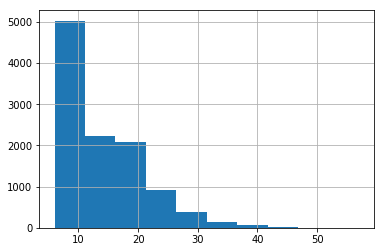

In [38]:
#sns.lmplot(data = train, x = "windspeed", y="count")
train["windspeed"].hist()

# Socre_Metric (모델성능- RMSLE)

In [39]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values +1)
    
    difference = np.square(log_predict - log_actual)
        
    score = np.sqrt(difference.mean())
    
    return score

rmsle_scorer = make_scorer(rmsle) # 이건 무엇을 할 것인지?
rmsle_scorer

make_scorer(rmsle)

# Cross Validation

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 79)

# RandomForestRegressor

In [41]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [42]:
feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'year', 'month', 'day', 'hour', 'dayofweek'] # hour 추가

feature_names2 = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek']

label_name = "count"

X_train = train[feature_names]
X_test = test[feature_names]
y_train = train[label_name]

print(X_train.shape)

(10886, 12)


In [43]:
model = RandomForestRegressor (random_state = 79)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=79, verbose=0, warm_start=False)

In [44]:
%time score = cross_val_score(model, X_train, y_train, cv = k_fold, scoring = rmsle_scorer)
score = score.mean()

print("Score = {0: .5f}".format(score))

Wall time: 5.13 s
Score =  0.33438


# Train 

In [45]:
model.fit (X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=79, verbose=0, warm_start=False)

In [46]:
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]

(6493,)


array([ 15.5,   4.3,   3.8,   6.4,  35.9,  85.5, 188.8, 125.1,  65.1,
        65.6])

[Text(0.5,1,'test')]

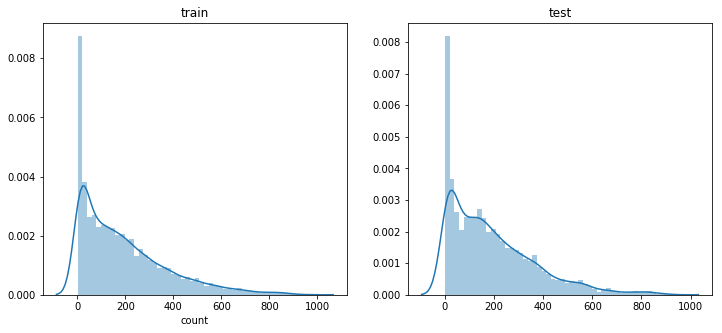

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12, 5)

sns.distplot(y_train, ax = ax1, bins = 50)
ax1.set(title = "train")
sns.distplot(predictions, ax = ax2, bins = 50)
ax2.set(title = "test")

# Submit

In [48]:
submission = pd.read_csv("data/bike/sampleSubmission.csv")
submission

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,15.5
1,2011-01-20 01:00:00,4.3
2,2011-01-20 02:00:00,3.8
3,2011-01-20 03:00:00,6.4
4,2011-01-20 04:00:00,35.9


In [49]:
submission.to_csv("data/bike/Score_{0: .5f}_submission.csv".format(score), index=False)